In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

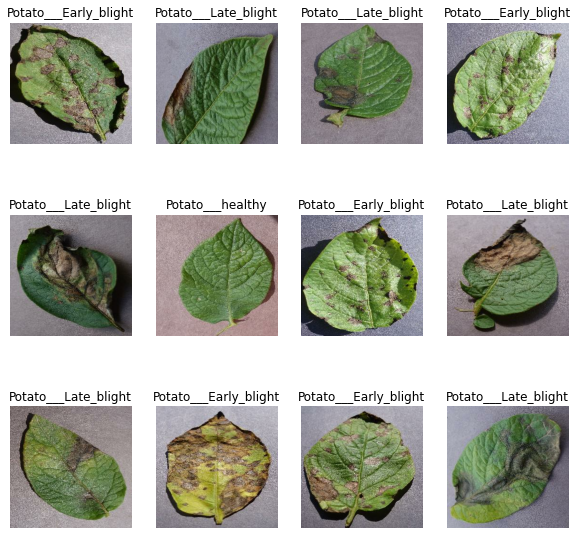

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [7]:
len(dataset)


68

In [8]:
# dataset ==>
# 80% ==> training 
# 20% ==> 10% validation 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
                 
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    tarin_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
 train_ds ,val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
 len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
#  It resize the image for model
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
# It flip the image according the train model
data_augmentation = tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
# Create a CNN for Model 
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 3

model = models.Sequential ([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32 ,(3,3) , activation = 'relu' , input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3), activation = 'relu' ),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64 ,(3,3) , activation = 'relu' ),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64 ,(3,3) , activation = 'relu' ),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64 ,(3,3) , activation = 'relu' ),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64 , activation = 'relu'),
     layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [25]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
  
)

Epoch 1/50
54/54 [==============================] - 87s 1s/step - loss: 0.9178 - accuracy: 0.4699 - val_loss: 0.8007 - val_accuracy: 0.4821
Epoch 2/50
54/54 [==============================] - 74s 1s/step - loss: 0.7409 - accuracy: 0.6418 - val_loss: 0.5662 - val_accuracy: 0.7679
Epoch 3/50
54/54 [==============================] - 70s 1s/step - loss: 0.4934 - accuracy: 0.7789 - val_loss: 0.3644 - val_accuracy: 0.8512
Epoch 4/50
54/54 [==============================] - 67s 1s/step - loss: 0.3493 - accuracy: 0.8571 - val_loss: 0.2778 - val_accuracy: 0.9107
Epoch 5/50
54/54 [==============================] - 71s 1s/step - loss: 0.3494 - accuracy: 0.8490 - val_loss: 0.4294 - val_accuracy: 0.8274
Epoch 6/50
54/54 [==============================] - 70s 1s/step - loss: 0.3186 - accuracy: 0.8785 - val_loss: 0.2952 - val_accuracy: 0.8869
Epoch 7/50
54/54 [==============================] - 68s 1s/step - loss: 0.2622 - accuracy: 0.8999 - val_loss: 0.2753 - val_accuracy: 0.8810
Epoch 8/50
54/54 [==

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 244ms/step - loss: 0.1838 - accuracy: 0.9492


In [28]:
scores

[0.18376366794109344, 0.94921875]

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

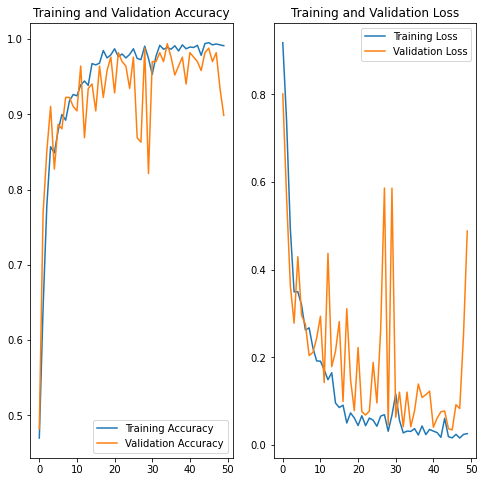

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict:
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


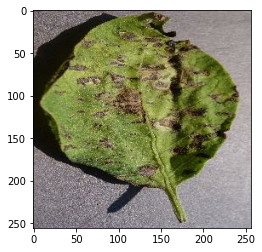

In [36]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict:")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

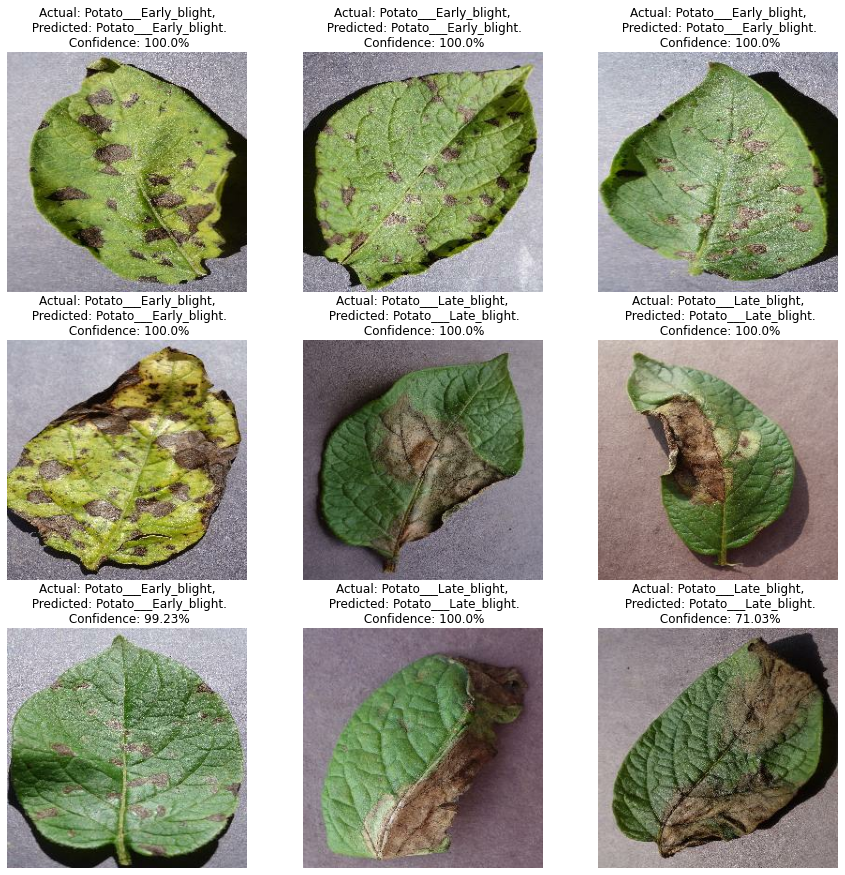

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [41]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets
